In [1]:
!nvidia-smi

Sat May  3 23:53:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.07                 Driver Version: 566.07         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   64C    P0             10W /   55W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Installing required packages and importing necessary modules.

In [2]:

!pip install streamlit -q
!npm install localtunnel -q

!pip install roboflow -q
!pip install ultralytics -q




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
npm notice
npm notice New major version of npm available! 10.8.2 -> 11.3.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.3.0
npm notice To update run: npm install -g npm@11.3.0
npm notice



added 22 packages in 2s

3 packages are looking for funding
  run `npm fund` for details



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Using annotated Dataset from Roboglow to fine tune the YOLO-V8 model

In [4]:
rf = Roboflow(api_key="ueb9x7kmupZkmaMP3c42")
project = rf.workspace("himani-jain").project("badmintonc")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BadmintonC-6 in yolov8:: 100%|██████████| 5084/5084 [00:02<00:00, 2082.05it/s]


You can skip the following cell in which model is trained. I have attached the saved model/weights file.

Training and Fine tuning the Yolo V8 model using the annotated dataset.

In [ ]:

model = YOLO("yolov8n.pt")  # You can choose other variants like yolov8s.pt, yolov8m.pt, etc.

# Step 3: Fine-tune the pre-trained model on your dataset
# The data.yaml file (inside dataset.location) specifies your training and validation splits.
model.train(data=dataset.location + "/data.yaml", epochs=50, imgsz=800)

# Step 4 (Optional): Evaluate the model on the validation set
metrics = model.val(data=dataset.location + "/data.yaml")
print(metrics)

New https://pypi.org/project/ultralytics/8.3.125 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.94  Python-3.13.0 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11260H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:\Users\nj301\Downloads\BadmintonC-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000002900D6E74C0>
Traceback (most recent call last):
  File "C:\Users\nj301\AppData\Roaming\Python\Python313\site-packages\matplotlib\transforms.py", line 195, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
KeyboardInterrupt: 
train: Scanning C:\Users\nj301\Downloads\BadmintonC-6\train\labels.cache... 1879 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1879/1879 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 1849, len(boxes) = 1874. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\nj301\Downloads\BadmintonC-6\valid\labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 354, len(boxes) = 369. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/118 [00:00<?, ?it/s]

Validation and testing the model.


0: 800x800 1 court, 260.6ms
1: 800x800 1 court, 260.6ms
2: 800x800 1 court, 260.6ms
3: 800x800 1 court, 260.6ms
Speed: 15.1ms preprocess, 260.6ms inference, 6.6ms postprocess per image at shape (1, 3, 800, 800)

Prediction details for image 1:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9780])
data: tensor([[  0.0000, 261.4692, 415.9732, 374.8209,   0.9780,   0.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[207.9866, 318.1451, 415.9732, 113.3516]])
xywhn: tensor([[0.5000, 0.7648, 0.9999, 0.2725]])
xyxy: tensor([[  0.0000, 261.4692, 415.9732, 374.8209]])
xyxyn: tensor([[0.0000, 0.6285, 0.9999, 0.9010]])


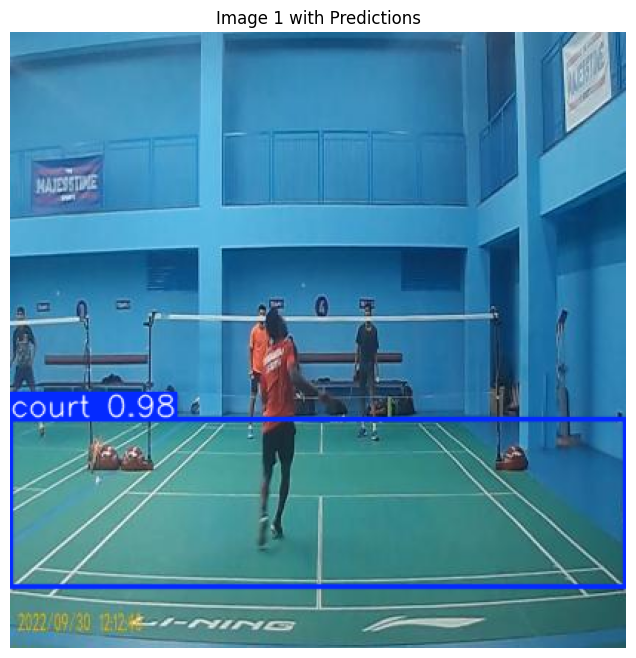


Prediction details for image 2:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9703])
data: tensor([[ 27.9443, 114.4766, 393.1285, 386.9661,   0.9703,   0.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[210.5364, 250.7214, 365.1843, 272.4895]])
xywhn: tensor([[0.5061, 0.6027, 0.8778, 0.6550]])
xyxy: tensor([[ 27.9443, 114.4766, 393.1285, 386.9661]])
xyxyn: tensor([[0.0672, 0.2752, 0.9450, 0.9302]])


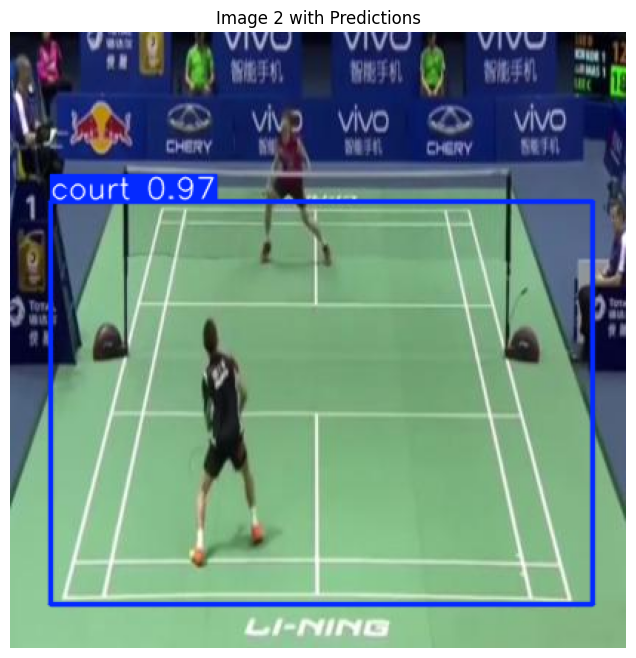


Prediction details for image 3:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9784])
data: tensor([[2.3169e-03, 2.6092e+02, 4.1600e+02, 3.7475e+02, 9.7845e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[208.0012, 317.8340, 415.9977, 113.8295]])
xywhn: tensor([[0.5000, 0.7640, 1.0000, 0.2736]])
xyxy: tensor([[2.3169e-03, 2.6092e+02, 4.1600e+02, 3.7475e+02]])
xyxyn: tensor([[5.5695e-06, 6.2721e-01, 1.0000e+00, 9.0084e-01]])


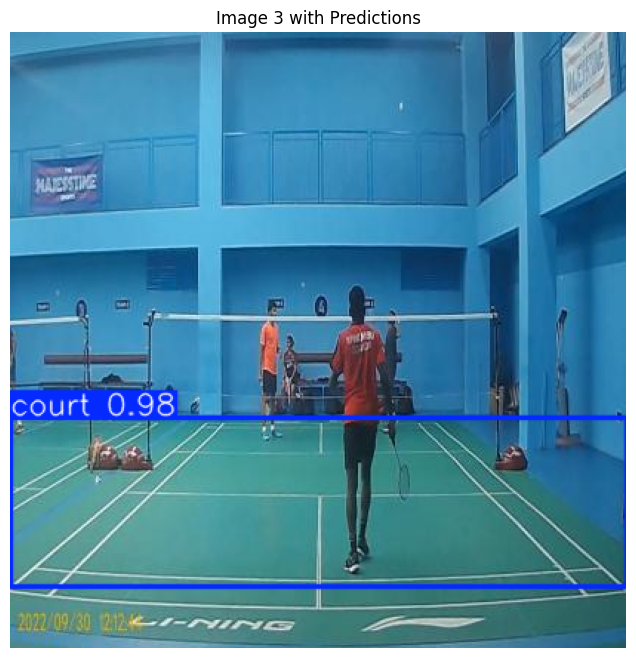


Prediction details for image 4:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9563])
data: tensor([[ 66.6876,  88.9366, 350.1261, 325.8228,   0.9563,   0.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[208.4068, 207.3797, 283.4385, 236.8861]])
xywhn: tensor([[0.5010, 0.4985, 0.6813, 0.5694]])
xyxy: tensor([[ 66.6876,  88.9366, 350.1261, 325.8228]])
xyxyn: tensor([[0.1603, 0.2138, 0.8416, 0.7832]])


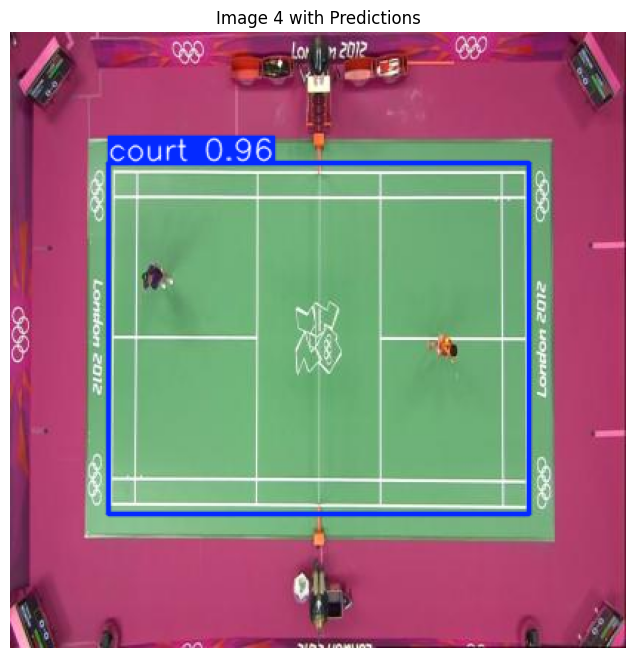

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)


100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]
val: Scanning /content/BadmintonC-6/valid/labels... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<00:00, 2424.62it/s]


val: New cache created: /content/BadmintonC-6/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 354, len(boxes) = 369. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:55<00:00,  4.82s/it]


                   all        369        369          1      0.957      0.978      0.976
Speed: 6.7ms preprocess, 298.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val

Evaluation Metrics:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a712d69dd90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,  

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model.
model = YOLO("/content/best.pt")

# List of image paths for prediction.
image_paths = [
    "/content/BadmintonC-6/test/images/2022_0930_121035_028_mp4-109_jpg.rf.9dfac2b595bc1f29a14fb1adc95b2a01.jpg",
    "/content/BadmintonC-6/test/images/Screenshot-from-2022-04-19-16-40-24_png.rf.71215fb27ad89614d93669b14ee7f66b.jpg",
    "/content/BadmintonC-6/test/images/2022_0930_121035_028_mp4-113_jpg.rf.98244596c86dc3c6b62a76ce3dcd6b79.jpg",  # Replace with your second image path
    "/content/BadmintonC-6/test/images/b2_mp4-182_jpg.rf.d187c5e9f5916f16c48446a8b8accb09.jpg",

    # Replace with your third image path
]

# Run predictions on all three images.
results = model.predict(source=image_paths, conf=0.25)

# Loop through each prediction result to print details and display annotated images.
for i, result in enumerate(results):
    print(f"\nPrediction details for image {i+1}:")
    print(result.boxes)  # prints bounding boxes, class labels, and confidence scores

    # Annotate the image with detections.
    annotated_img = result.plot()  # returns an image with detections overlaid

    # Display the annotated image.
    plt.figure(figsize=(10, 8))
    # Convert image from BGR (OpenCV format) to RGB.
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1} with Predictions")
    plt.axis("off")
    plt.show()

# Evaluate the model on the test dataset.
# Adjust the 'data' parameter according to your dataset configuration if needed.

# eval_results = model.val(data=dataset.location + "/data.yaml")
# print("\nEvaluation Metrics:")
eval_results = model.val(data=dataset.location + "/data.yaml", conf=0.95)
print("\nEvaluation Metrics:")
print(eval_results)
# print(eval_results)

# Assuming eval_results is a dictionary with keys 'precision', 'recall', 'mAP50', and 'mAP50-95'
metrics = {}
if isinstance(eval_results, dict):
    for key in ["precision", "recall", "mAP50", "mAP50-95"]:
        if key in eval_results:
            metrics[key] = eval_results[key]

# Plot the evaluation metrics in a bar chart for a clear visual overview.
if metrics:
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())

    plt.figure(figsize=(8, 6))
    bars = plt.bar(metric_names, metric_values, color='skyblue')
    plt.ylim([0, 1])
    plt.title("Evaluation Metrics")
    plt.ylabel("Value")

    # Annotate each bar with its metric value.
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    plt.show()


Running the model on input video and
Before Running the model, Upload the input video file to the colab session storage and then paste the path to the video file in the variable input_video_path.

In [ ]:
import numpy as np
import cv2
from ultralytics import YOLO
from google.colab import files  # Import files from google.colab for downloading

# Define input and output video paths.
input_video_path = "PXL_20250125_091952723.TS.mp4"#paste here the path to input video file.
output_video_path = "outvideo.mp4"

# Load the YOLOv8 model
model = YOLO("/content/best.pt") #paste the path to savel model/weights.



# Define separate offsets for x and y directions (in pixels).
x_offset = -220
y_offset = 100

# Open the input video.
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    raise IOError("Cannot open video file: " + input_video_path)

# Get video properties.
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object for the output video.
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference on the current frame using your YOLOv8 model.
    results = model(frame, conf=0.25)
    result = results[0]

    # Create a black image with the same dimensions as the frame.
    processed_frame = np.zeros_like(frame)

    if result.boxes is not None and len(result.boxes) > 0:
        max_area = 0
        best_box = None

        # Loop over all detected boxes to choose the one with the largest area.
        for box in result.boxes:
            coords = box.xyxy[0]
            x1, y1, x2, y2 = map(int, coords.tolist())
            area = (x2 - x1) * (y2 - y1)
            if area > max_area:
                max_area = area
                best_box = (x1, y1, x2, y2)

        if best_box is not None:
            x1, y1, x2, y2 = best_box

            # Adjust the box boundaries using separate x and y offsets.
            x1_new = max(0, x1 - x_offset)
            y1_new = max(0, y1 - y_offset)
            x2_new = min(width, x2 + x_offset)
            y2_new = min(height, y2 + y_offset)

            # Copy the region corresponding to the adjusted bounding box.
            processed_frame[y1_new:y2_new, x1_new:x2_new] = frame[y1_new:y2_new, x1_new:x2_new]

    # Write the processed frame (with the court in focus) to the output video.
    out.write(processed_frame)

# Release resources.
cap.release()
out.release()

# Download the output video.
files.download(output_video_path)



0: 480x800 1 court, 148.7ms
Speed: 12.1ms preprocess, 148.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 139.1ms
Speed: 4.2ms preprocess, 139.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 150.3ms
Speed: 4.4ms preprocess, 150.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 133.6ms
Speed: 4.4ms preprocess, 133.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 134.6ms
Speed: 4.3ms preprocess, 134.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 136.0ms
Speed: 4.2ms preprocess, 136.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 135.4ms
Speed: 4.1ms preprocess, 135.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 131.2ms
Speed: 4.1ms preprocess, 131.2ms inference, 0.7ms postprocess per image at shape 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


0: 480x800 1 court, 58.6ms
Speed: 3.7ms preprocess, 58.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)
Court region cropped: (325, 446) to (1615, 1011)
TL corner: (595, 460)
TR corner: (1593, 460)
BR corner: (1596, 996)
BL corner: (332, 996)


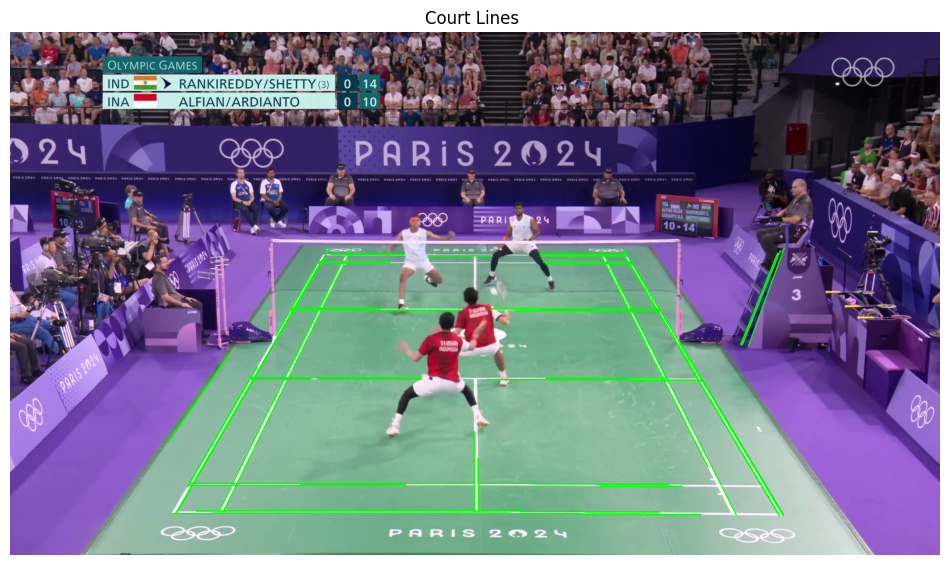

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from itertools import combinations

# Load the model
model = YOLO("best.pt")

def compute_intersection(l1, l2):
    x1, y1, x2, y2 = l1
    x3, y3, x4, y4 = l2
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if abs(denom) < 1e-6:
        return None
    px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / denom
    py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / denom
    return int(px), int(py)

def detect_lines_and_corners_on_original(image, x_offset, y_offset, court_crop):
    gray = cv2.cvtColor(court_crop, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=120, minLineLength=80, maxLineGap=10)
    if lines is None:
        print("No lines detected.")
        return image

    lines = [tuple(line[0]) for line in lines]

    # Draw lines on the original image (adjusting for offset)
    image_with_lines = image.copy()
    for x1, y1, x2, y2 in lines:
        cv2.line(image_with_lines, (x1 + x_offset, y1 + y_offset), (x2 + x_offset, y2 + y_offset), (0, 255, 0), 2)

    # Compute intersections for logic (but do not mark on image)
    intersections = []
    h, w = court_crop.shape[:2]
    for l1, l2 in combinations(lines, 2):
        pt = compute_intersection(l1, l2)
        if pt and 0 <= pt[0] < w and 0 <= pt[1] < h:
            intersections.append(pt)

    if len(intersections) < 4:
        print(f"Only {len(intersections)} intersections found.")
        return image_with_lines

    intersections = np.array(intersections)
    s = intersections[:, 0] + intersections[:, 1]
    d = intersections[:, 0] - intersections[:, 1]
    tl = tuple(intersections[np.argmin(s)])
    br = tuple(intersections[np.argmax(s)])
    tr = tuple(intersections[np.argmax(d)])
    bl = tuple(intersections[np.argmin(d)])

    # Just print corner coordinates (optional)
    for label, (x, y) in zip(['TL', 'TR', 'BR', 'BL'], [tl, tr, br, bl]):
        x_orig, y_orig = x + x_offset, y + y_offset
        print(f"{label} corner: ({x_orig}, {y_orig})")

    return image_with_lines

def detect_court_and_draw_on_original(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Image not found")

    results = model(image)
    boxes = results[0].boxes

    if len(boxes) == 0:
        raise ValueError("No court detected by YOLO model.")

    # Assume first box is the court
    x1, y1, x2, y2 = map(int, boxes.xyxy[0].cpu().numpy())

    # Crop the court region
    court_crop = image[y1:y2, x1:x2]
    print(f"Court region cropped: ({x1}, {y1}) to ({x2}, {y2})")

    # Detect lines and corners and draw them on original image
    result_img = detect_lines_and_corners_on_original(image, x1, y1, court_crop)

    # Show final image
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title("Court Lines ")
    plt.axis("off")
    plt.show()

# Run on an image
detect_court_and_draw_on_original("Court_type (1).jpg")


Pixel errors (detected vs expected corner) in pixels: [        263           3           0           0]
Detected corner angles (deg) and errors from 90°: [116.14, 90.32, 89.68, 63.86] -> angular errors (deg): [26.14, 0.32, 0.32, 26.14]
Length consistency (ratios of opposite sides): {'top/bottom ratio': np.float64(0.79), 'left/right ratio': np.float64(0.9)}


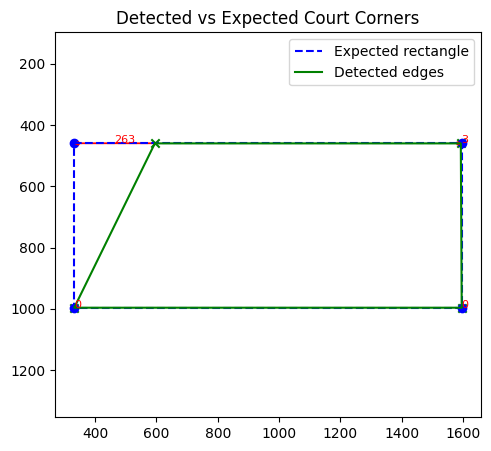

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Example detected corners (from YOLO output) and synthetic ideal rectangle corners
det_corners = np.array([[595,460], [1593,460], [1596,996], [332,996]])  # TL, TR, BR, BL
# Compute expected as axis-aligned rectangle from min/max coordinates
minx, miny = det_corners[:,0].min(), det_corners[:,1].min()
maxx, maxy = det_corners[:,0].max(), det_corners[:,1].max()
exp_corners = np.array([[minx, miny], [maxx, miny], [maxx, maxy], [minx, maxy]])  # ideal TL, TR, BR, BL

# Metric 1: Pixel errors (Euclidean distance)
pixel_errors = np.linalg.norm(det_corners - exp_corners, axis=1)
print("Pixel errors (detected vs expected corner) in pixels:", np.round(pixel_errors,2))

# Metric 2: Angular errors at each corner
def angle_deg(A, B, C):
    BA, BC = A - B, C - B
    cosang = np.dot(BA, BC) / (np.linalg.norm(BA)*np.linalg.norm(BC))
    cosang = np.clip(cosang, -1.0, 1.0)
    return math.degrees(math.acos(cosang))

# Angles at TL, TR, BR, BL from detected corners
angles = [
    angle_deg(det_corners[3], det_corners[0], det_corners[1]),  # angle at TL
    angle_deg(det_corners[0], det_corners[1], det_corners[2]),  # TR
    angle_deg(det_corners[1], det_corners[2], det_corners[3]),  # BR
    angle_deg(det_corners[2], det_corners[3], det_corners[0])   # BL
]
angle_errors = [abs(a - 90) for a in angles]
print("Detected corner angles (deg) and errors from 90°:", [round(a,2) for a in angles], 
      "-> angular errors (deg):", [round(e,2) for e in angle_errors])

# Metric 3: Side-length consistency (opposite sides of ideal rectangle)
top_len = np.linalg.norm(det_corners[0] - det_corners[1])
bottom_len = np.linalg.norm(det_corners[3] - det_corners[2])
left_len = np.linalg.norm(det_corners[0] - det_corners[3])
right_len = np.linalg.norm(det_corners[1] - det_corners[2])
length_ratios = {
    "top/bottom ratio": round(min(top_len,bottom_len)/max(top_len,bottom_len), 2),
    "left/right ratio": round(min(left_len,right_len)/max(left_len,right_len), 2)
}
print("Length consistency (ratios of opposite sides):", length_ratios)

# Plot overlay of detected vs expected corners with error vectors
plt.figure(figsize=(5.5,5))
# Plot ideal rectangle (blue dashed) and detected polygon (green)
exp = np.vstack([exp_corners, exp_corners[0]])
det = np.vstack([det_corners, det_corners[0]])
plt.plot(exp[:,0], exp[:,1], 'b--', label='Expected rectangle')
plt.plot(det[:,0], det[:,1], 'g-', label='Detected edges')
# Plot corners
plt.scatter(det_corners[:,0], det_corners[:,1], c='g', marker='x')
plt.scatter(exp_corners[:,0], exp_corners[:,1], c='b', marker='o')
# Draw error vectors (red arrows) and annotate pixel error
for i,(dx,dy) in enumerate(det_corners):
    ex,ey = exp_corners[i]
    # arrow from detected to expected
    plt.arrow(dx, dy, ex-dx, ey-dy, color='r', head_width=10, head_length=15, length_includes_head=True)
    # label with error magnitude
    plt.text((dx+ex)/2, (dy+ey)/2, str(int(pixel_errors[i])), color='r', fontsize=8)
plt.gca().invert_yaxis()
plt.axis('equal'); plt.legend()
plt.title("Detected vs Expected Court Corners")
plt.savefig("evaluation_overlay.png")
plt.show()
